In [31]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
include("src/basic_CPHL_utils.jl")


N_g = 10;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);

In [32]:
include("src/CPHL_module.jl")

N_sites = 20
cphl = CPHL.CPHLSolver(N_sites, g_vals);

Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function


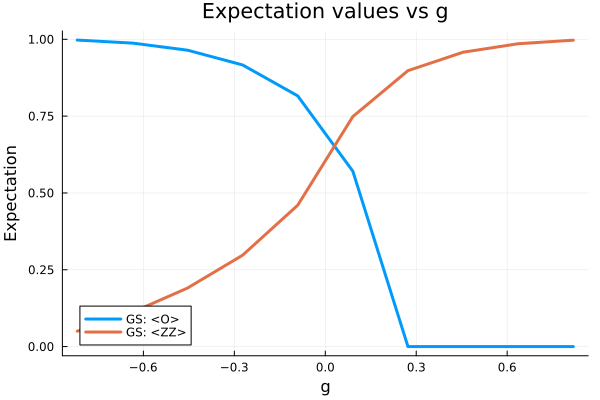

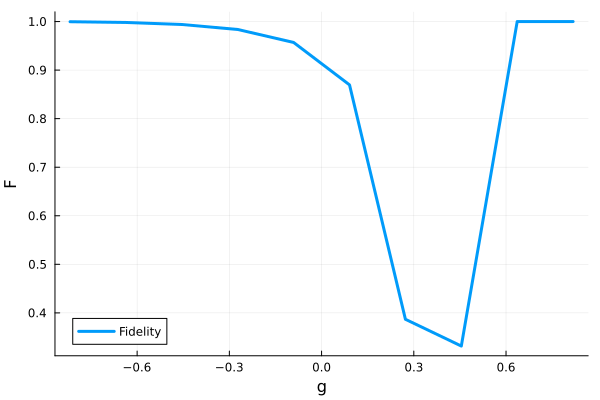

In [ ]:
CPHL.SetUpHamiltonians(cphl);

cphl.OStringWeight = .1
CPHL.OptimizeCPDMRG(cphl);


In [34]:
C_mat_upd = CPHL.GenerateUpdCMat(cphl)
AlphaMat_upd = EstimateHarmFromCMat(C_mat_upd, cphl.HarmFromVecMat)
C_mat_upd_v2 = GenerateCMatFromALPHAMat(AlphaMat_upd, cphl.DesignMat)

10×5 Matrix{Float64}:
 -0.013246    -0.0150078   -0.0121242   -0.0113624   -0.239244
  0.00211002   0.00217681   0.00179307   0.00179819   0.0112459
  0.0144915    0.0164205    0.0132963    0.0123931    0.260376
 -0.00539393  -0.0062923   -0.00468526  -0.00453589  -0.0320661
 -0.0186986   -0.0249699   -0.0180496   -0.0154128   -0.327315
  0.00730638  -0.00295907   0.00302772   0.00767715   0.0418994
  0.00749308  -0.00840238   0.00183723   0.00814828   0.380256
 -0.0939532   -0.121104    -0.0883805   -0.0795328   -0.473506
 -0.222872    -0.258967    -0.201866    -0.191219    -1.93709
 -0.203836    -0.231373    -0.183187    -0.175337    -1.97534

In [35]:
CPHL.SetUpHamiltonians(cphl);

cphl.OStringWeight = 0.3
CPHL.OptimizeCPDMRG(cphl);


Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function


In [36]:
delta_step = 0.5
Max_iter = 100
tol = 2.0 * 1e-3
for iter in 1:Max_iter
    C_mat_upd = CPHL.GenerateUpdCMat(cphl)
    AlphaMat_upd = EstimateHarmFromCMat(C_mat_upd, cphl.HarmFromVecMat)
    current_error = norm( AlphaMat_upd - cphl.ALPHAMat)
    println("Current error = $(current_error)")

    cphl.ALPHAMat = (1 - delta_step) * cphl.ALPHAMat + delta_step * AlphaMat_upd
    cphl.CMat = GenerateCMatFromALPHAMat(cphl.ALPHAMat, cphl.DesignMat)

    CPHL.SetUpHamiltonians(cphl)
    CPHL.OptimizeCPDMRG(cphl)
    
    if current_error < tol
        println("Converged in $(iter) iterations")
        break
    end
end

Current error = 1.2507328752947784
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 1.3825131809702207
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.9905877886421713
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.5511419002018112
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.5653756192243178
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.40920233798268774
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.3173735518166843
Successful pass, generated Hamiltonians and GSs
Successful pass, optimized the cost function
Current error = 0.25571858029253763
Successful pass, generated Hamiltonians and GSs


LoadError: InterruptException:

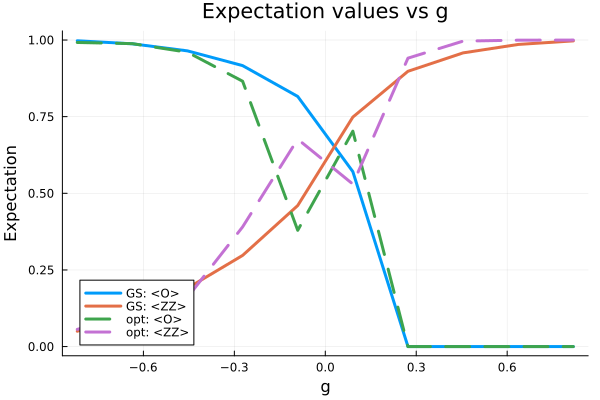

In [37]:
plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)


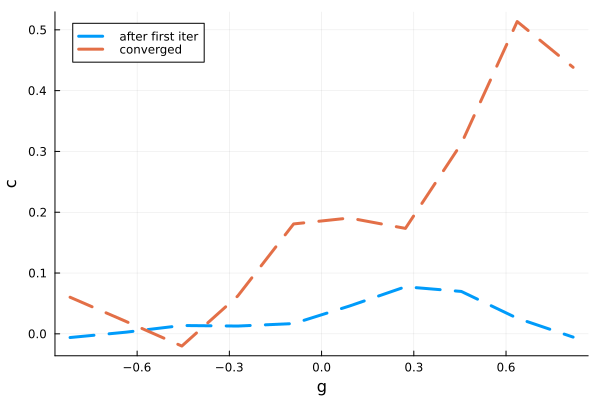

In [ ]:
idx = 5
# pC = plot(cphl.g_vals, C_mat_upd[:, idx], label="c", title="reconstructed  coeff", xlabel="g", ylabel="c", linewidth=3)
pC = plot(cphl.g_vals, C_mat_upd_v2[:, idx], label="after first iter", xlabel="g", ylabel="c", linewidth=3, linestyle = :dash)
plot!(pC, cphl.g_vals, cphl.CMat[:, idx], label="converged", xlabel="g", ylabel="c", linewidth=3, linestyle = :dash)

display(pC)

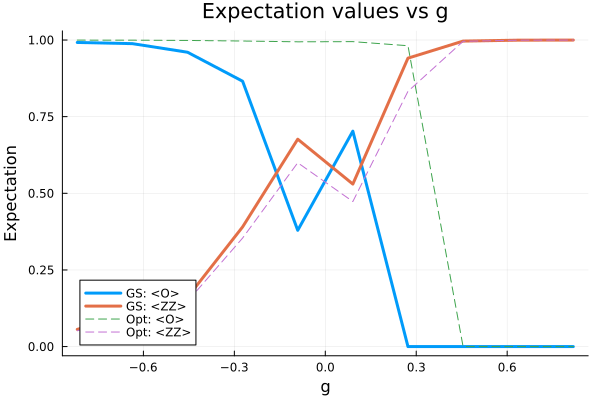

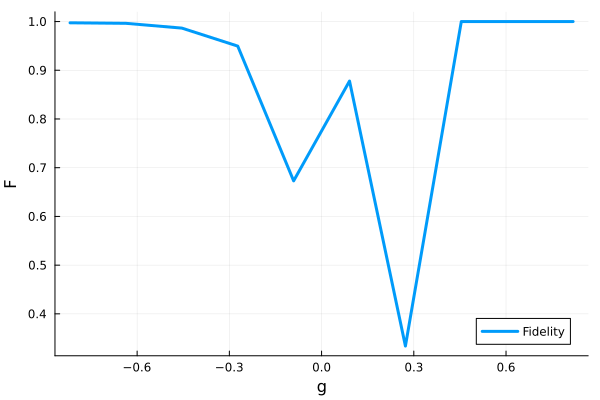

In [38]:

p = plot(cphl.g_vals, cphl.OString_GS_vals, label="GS: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="GS: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_opt_vals, label="Opt: <O>", linewidth=1, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_opt_vals / (cphl.N_sites - 1), label="Opt: <ZZ>", linewidth=1, linestyle = :dash);

f = plot(cphl.g_vals, cphl.Fidelities_vals, label="Fidelity", xlabel="g", ylabel="F", linewidth=3)

display(p)
display(f)